# Instalaçoes e bibliotecas necessárias

In [2]:
!pip install unidecode openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 3.6 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import pandas as pd
import re
import string
from unidecode import unidecode
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
!ls "/content/drive/MyDrive/Colab Notebooks/MiniProjeto/dataset"


CorpusTwitchVideogames_Extension2024.xlsx  CorpusTwitchVideojuegos.xlsx


In [11]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MiniProjeto/dataset/CorpusTwitchVideojuegos.xlsx")
df = df[['TEXTO', 'Polaridad']].dropna()
#alterar dataset:
#df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MiniProjeto/dataset/CorpusTwitchVideogames_Extension2024.xlsx")

In [ ]:
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer('spanish')

# Função de pré-processamento

In [ ]:
def preprocess(text):
    text = str(text).lower()                          # Letras minúsculas
    text = unidecode(text)                            # Remove acentos
    text = re.sub(r'(.)\1{2,}', r'\1', text)          # Reduz repetição de letras
    text = re.sub(r'\b(j[aeiou]{1,})+\b', 'jaja', text)  # Risadas → jaja
    text = re.sub(r'\bx[o0]+\b', 'pero', text)        # xo → pero
    text = re.sub(r'\bxfa\b', 'por favor', text)      # xfa → por favor
    text = re.sub(r'@\w+', '', text)                  # Remove @menções
    text = re.sub(r'#\w+', '', text)                  # Remove #hashtags
    text = re.sub(r'http\S+', '', text)               # Remove URLs
    text = re.sub(r'\b(streamlabs|nightbot)\b', '', text)  # Remove bots
    text = re.sub(r'\w*\d\w*', '', text)              # Remove nomes com números
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove pontuação
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)


# Aplica o pré-processamento

In [ ]:
df['clean_text'] = df['TEXTO'].apply(preprocess)

# Vetorização com TF-IDF e preparação de dados


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

In [ ]:
y = df['Polaridad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Definindo modelos

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
svm_model = SVC(C=15, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=15, random_state=42)

# Realizando predições

In [ ]:
rf_pred = rf_model.predict(X_test)


In [ ]:
svm_pred = svm_model.predict(X_test)

# Resultados

***relatórios de classificação***

In [ ]:
print("\nSVM:")
print(classification_report(y_test, svm_pred))
#MEU TESTE: KERNEL RFB, C = 1


SVM:
               precision    recall  f1-score   support

Indeterminado       0.68      0.15      0.25        86
     Negativo       0.61      0.82      0.70       285
     Positivo       0.74      0.65      0.69       294

     accuracy                           0.66       665
    macro avg       0.68      0.54      0.55       665
 weighted avg       0.67      0.66      0.64       665



In [ ]:
print("\nRandom Forest:\n")
print(classification_report(y_test, rf_pred))
#MEU TESTE: max_features = 'log2', n_estimators = 500


Random Forest:

               precision    recall  f1-score   support

Indeterminado       0.61      0.16      0.26        86
     Negativo       0.58      0.80      0.67       285
     Positivo       0.72      0.61      0.66       294

     accuracy                           0.63       665
    macro avg       0.64      0.53      0.53       665
 weighted avg       0.65      0.63      0.61       665



***F1-score***

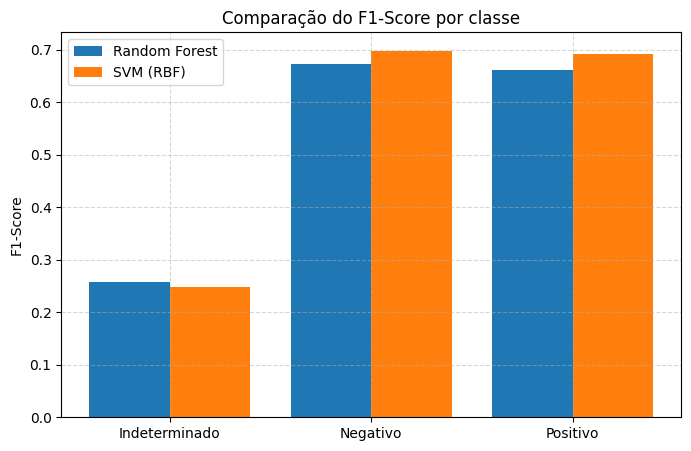

In [ ]:
from sklearn.metrics import f1_score

f1_rf = f1_score(y_test, rf_pred, average=None)
f1_svm = f1_score(y_test, svm_pred, average=None)
classes = ['Indeterminado', 'Negativo', 'Positivo']

x = range(len(classes))
plt.figure(figsize=(8, 5))
plt.bar(x, f1_rf, width=0.4, label='Random Forest', align='center')
plt.bar([i + 0.4 for i in x], f1_svm, width=0.4, label='SVM (RBF)', align='center')
plt.xticks([i + 0.2 for i in x], classes)
plt.ylabel('F1-Score')
plt.title('Comparação do F1-Score por classe')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Matrizes de confusão

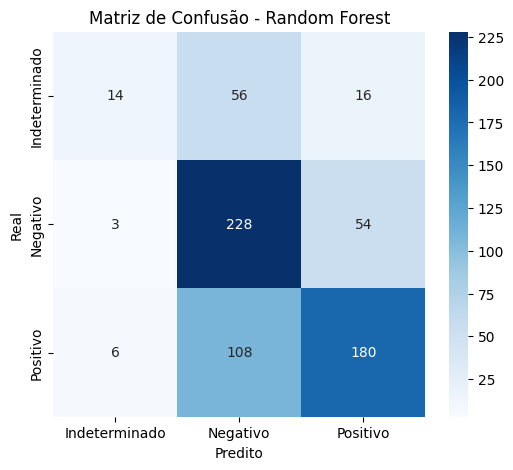

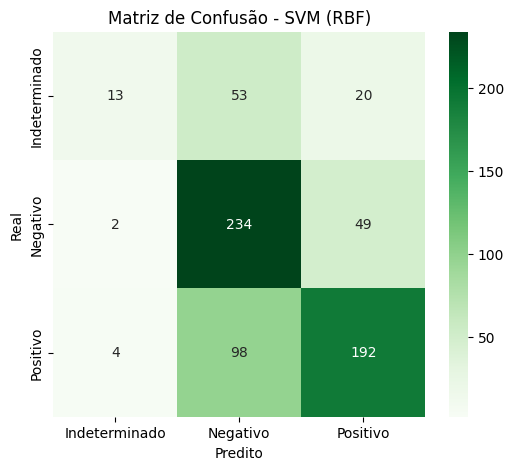

In [ ]:
# Gerando matriz
cm_rf = confusion_matrix(y_test, rf_pred, labels=classes)
cm_svm = confusion_matrix(y_test, svm_pred, labels=classes)

# Plot matriz de confusão Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Plot matriz de confusão SVM
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - SVM (RBF)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()